In [1]:
cd ..

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [20]:
# specify path to the lightcurve and spectrum
lc_path = "proxima/ProxCen_LC.csv"
spec_path = "proxima/ProxCen_spec.csv"

# object name (or abbreviation)
n = "ProxCen"

# resample length for time-sorted LC purposes
resample_len = '4min'

In [37]:
#load into pandas dataframes
lc = pd.read_csv(lc_path)
spec = pd.read_csv(spec_path)

time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
# phase_preproc_lc = LC_phasesort_preproc(lc, bins=phase_bins())
# phasefit_preproc_lc = LC_phasefit_preproc(lc_path, bins=phase_bins())
preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)    

# Time Sorted Light Curve

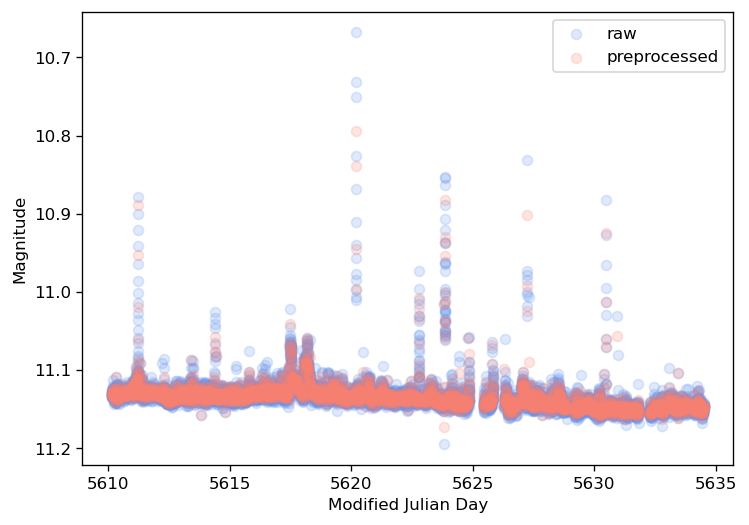

In [38]:
fig1 = plot_timesort(lc, time_preproc_lc)#, start=5622, end=5626)

The MJD range *5622.6 - 5624.2* contains two pulsation events, and 576 data points

In [39]:
time_preproc_lc_final = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(5622.6, 5624.2)]

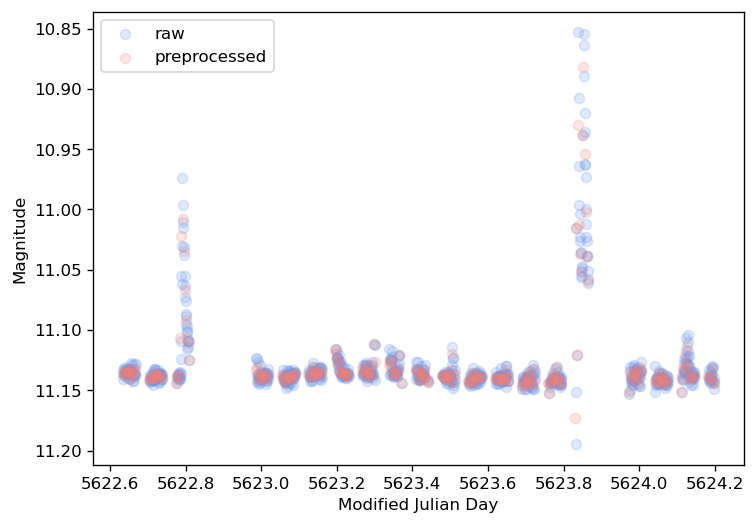

In [44]:
fig1 = plot_timesort(lc, time_preproc_lc_final, start=5622.6, end=5624.2)

In [ ]:
len(time_preproc_lc_final)

In [47]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc_final) / 8.5), "s")

Estimated video time of 67.76470588235294 s


A video of just over a minute should be appropriate for nearly two days of observation time. Additionally, the gaps are important / interesting to hear. This data is from the Hubble Space Telescope, a space telescope which orbits the Earth once every 95 seconds. The listener will be able to hear silent gaps in the observations which corresponds to the Earth passing between Hubble and Proxima Centauri. The two flares are easily heard, but over quickly.

**PROBLEMS: The days given in the raw .csv are not MJD...unless this data was taken in 1876? Ask Paul about this and we will have to convert to MJD somehow.**

# Spectra

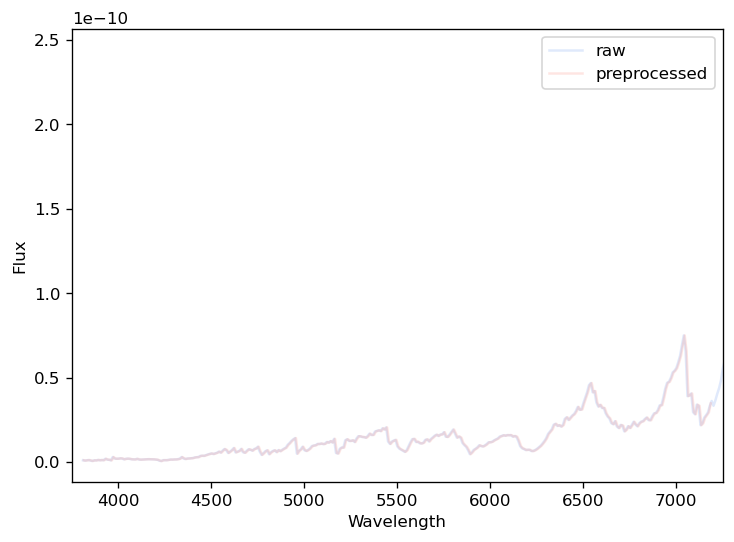

In [30]:
fig2 = plot_spectra(spec, preproc_spec)

# Save Preprocessed Files

In [31]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)